In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Generate data

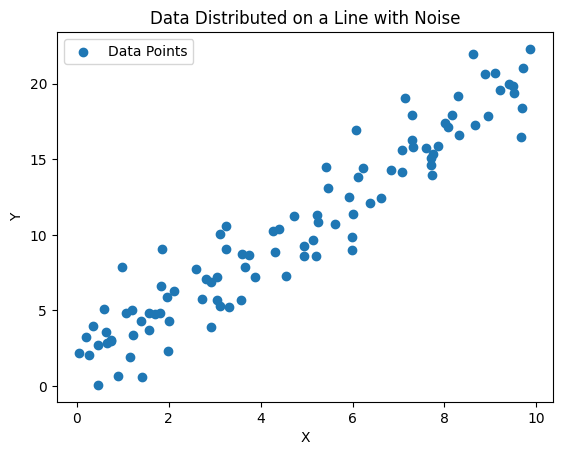

In [54]:
# Define the parameters for the line equation (y = mx + b)
m = 2.0  # Slope of the line
b = 1.0  # Y-intercept of the line

np.random.seed(42)

# Generate random x values
num_points = 100
x = np.random.uniform(0, 10, num_points)  # Adjust the range as needed

# Generate y values with some random noise
noise = np.random.normal(0, 2, num_points)  # Adjust the standard deviation for noise
y = m * x + b + noise

# Plot the data points
plt.scatter(x, y, label="Data Points")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Data Distributed on a Line with Noise")
plt.show()

## Define Linear model

In [55]:
# Define the linear model (y = mx + b)
def linear_model(params, x):
    # m = slope, b = bias
    m, b = params
    return m * x + b

## Objective function

The objective/loss function is defined as the following:

$$
\[\text{Objective Function (Loss)} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + b))^2\]
$$

In [56]:
# Define the objective function to minimize (sum of squared residuals)
def objective(params, x, y):
    return np.sum((y - linear_model(params, x))**2)/len(x)

## Investigating the objective function

We begin by taking the derivative of L with respect to m and b. Solving the equations analytically, we set the equations to zero and solve for m and b to find the global minimums. 

b minimum is solved to:

$$b_0 = \bar{y} - m \cdot \bar{x}$$

In [57]:
analytical_b = np.mean(y) - 2 * np.mean(x)
analytical_b

0.9978392796652873

m minimum is solved to: 

$$m = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

In [58]:
numerator = 0
for i in range(len(y)):
    numerator += (x[i] - np.mean(x)) * (y[i] - np.mean(y))

denominator = 0
for i in range(len(y)):
    denominator += (x[i] - np.mean(x))**2

analytical_m = numerator/denominator
analytical_m

1.908045354575393

### Visualizing the loss with respect to m

Next we use the value derived values of a and b to investigate the loss/objective function with respect to the other variables separately.

In [59]:
# Define a range of values for "m"
m_values = np.linspace(-5, 5, num_points)
b_values =  np.linspace(-5, 5, num_points)


In [60]:
# Calculate the loss (objective function value) for each "m" value
loss_values = np.zeros_like(m_values)

for i in range(len(m_values)):
    m = m_values[i]
    # freeze b parameter
    b = 1
    params = m, b
    loss_values[i] = objective(params, x, y)

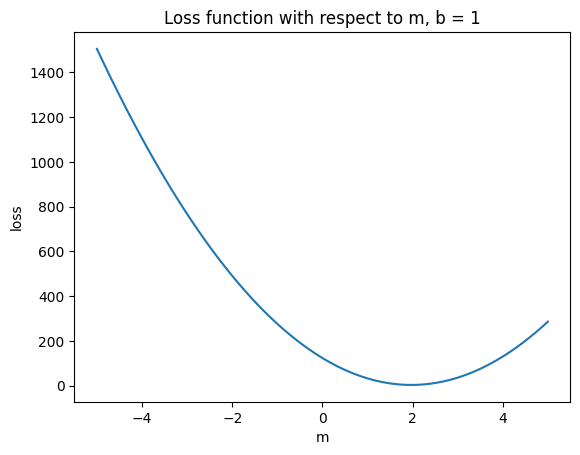

In [61]:
plt.plot(m_values, loss_values)
plt.xlabel("m")
plt.ylabel("loss")
plt.title("Loss function with respect to m, b = 1")
plt.show()

In [62]:
m_values[np.argmin(loss_values)]

1.9696969696969697

Visualizing the loss with respect to b

In [63]:
y.shape

(100,)

In [64]:
# Calculate the loss (objective function value) for each "m" value
loss_values = np.zeros_like(b_values)

for i in range(len(b_values)):
    b = b_values[i]
    # freeze b parameter
    m = 2
    params = m, b
    loss_values[i] = objective(params, x, y)

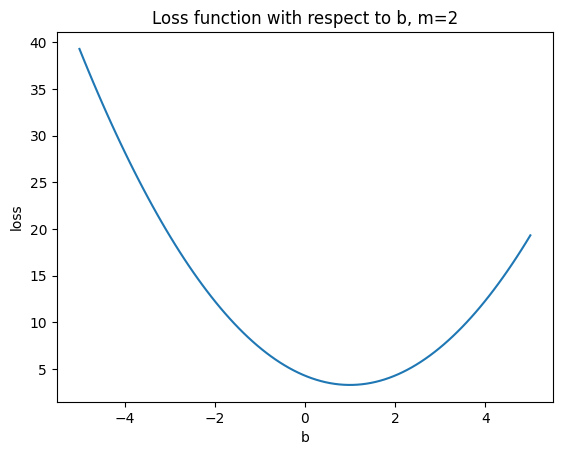

In [65]:
plt.plot(b_values, loss_values)
plt.xlabel("b")
plt.ylabel("loss")
plt.title("Loss function with respect to b, m=2")
plt.show()

In [66]:
b_values[np.argmin(loss_values)]

0.9595959595959593

### Loss function with respect to both m and b

The loss is in reality a function of two variables. If we do not want to solve for m and b analytically we can instead find the minimum by using numerical optimization techniques. 

For the purpose of clarifying what this means we will visualize the loss in two dimensions, for m and b

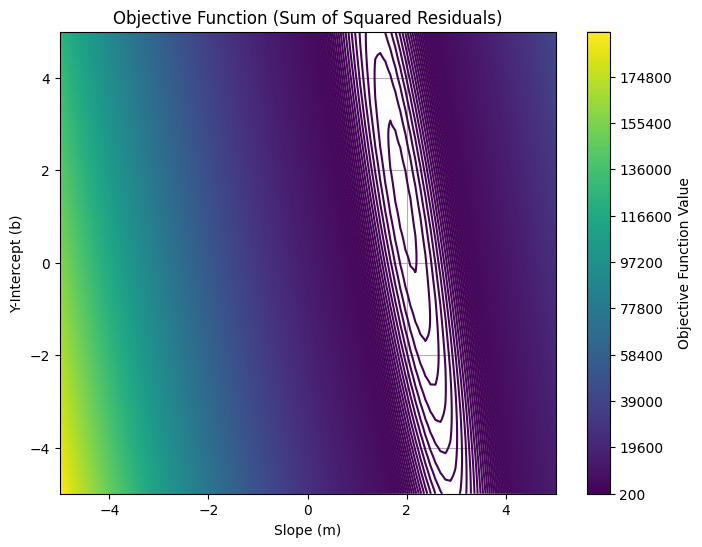

In [67]:
# Create a grid of "m" and "b" values
M, B = np.meshgrid(m_values, b_values)

loss_matrix = np.zeros_like(M)

for i in range(len(m_values)):
    for j in range(len(b_values)):
        m = M[i, j]
        b = B[i, j]
        loss_matrix[i, j] = np.sum((y - (m * x + b))**2)
        
# Create a contour plot of the objective function
plt.figure(figsize=(8, 6))
contour = plt.contour(M, B, loss_matrix, levels=1000, cmap='viridis')
plt.colorbar(contour, label='Objective Function Value')
plt.xlabel('Slope (m)')
plt.ylabel('Y-Intercept (b)')
plt.title('Objective Function (Sum of Squared Residuals)')
plt.grid(True)
plt.show()

Studying the above visualization, we can see that the loss function has its minima around slope 2 and intercept 1, which checks out with previous analysis. 

We can also see that the optimal slope increases as the intercept decreases, which makes sense.

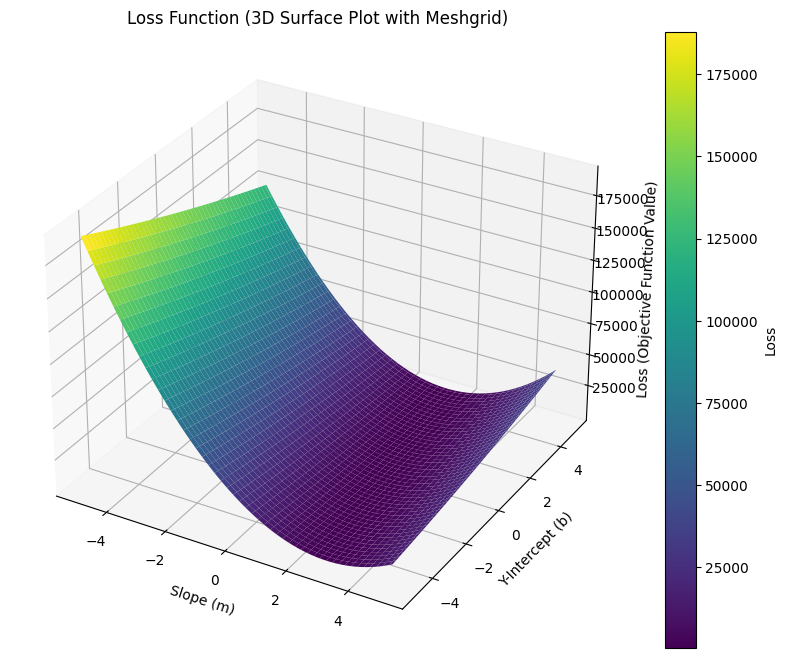

In [68]:
M, B = np.meshgrid(m_values, b_values)
# Create 3D surface plot with a meshgrid
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(M, B, loss_matrix, cmap='viridis')
plt.xlabel('Slope (m)')
plt.ylabel('Y-Intercept (b)')
ax.set_zlabel('Loss (Objective Function Value)')
plt.title('Loss Function (3D Surface Plot with Meshgrid)')
plt.colorbar(surface, label='Loss')
plt.show()

The above visualization is not as clear, but we can see very clearly that the optimal slope is around 2, though it climbs higher as intercept decreases, which makes sense. 

Let's see what values for m and b the minimum of the 2-dimensional loss curve corresponds to. 

Observe that values may differ between the different methods, especially with fewer datapoints since the minimum of the curves is derived numerically, with the 1d cases constrained by fixed variables. 


In [69]:
# Find the indices of the minimum loss value in the matrix
min_indices = np.unravel_index(np.argmin(loss_matrix), loss_matrix.shape)

# Get the corresponding values of "m" and "b"
optimal_m = m_values[min_indices[1]]
optimal_b = b_values[min_indices[0]]

# Get the minimum loss value
min_loss = loss_matrix[min_indices]

print(f"Optimal Slope (m): {optimal_m}")
print(f"Optimal Y-Intercept (b): {optimal_b}")
print(f"Minimum Loss Value: {min_loss}")

Optimal Slope (m): 1.8686868686868685
Optimal Y-Intercept (b): 1.5656565656565657
Minimum Loss Value: 324.236994753678


## Optimization

Previously we defined the objective/loss function as:

$$
\[\text{Objective Function (Loss)} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + b))^2\]
$$

The derivatives of the objective/loss function with respect to m and b and defined as the following:

$$
\[\frac{\partial \text{Loss}}{\partial m} = -\frac{2}{N} \sum_{i=1}^{N} x_i(y_i - (mx_i + b))\]
$$

$$
\[\frac{\partial \text{Loss}}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (mx_i + b))\]
$$

These derivatives then, describes the rate of change for the loss function, a positive value indicates that the function currently slopes upwards, where a negative value would indicate the opposite. 

Since our objective with optimization is to minimize the loss function we can use the value of the gradients for different values of m and b to evaluate in what direction we should nudge our parameters.

### Gradient checking

In [70]:
def d_loss_dm(x, y, m, b):
    N = len(x)
    # Compute the derivative with respect to m
    return (-2/N) * np.sum(x * (y - (m * x + b)))

def d_loss_db(x, y, m, b):
    N = len(x)
    # Compute the derivative with respect to b
    return (-2/N) * np.sum(y - (m * x + b))

In [71]:
initial_m = 1.0
initial_b = 0.0

print("m grad: ", d_loss_dm(x, y, initial_m, initial_b))
print("b grad: ", d_loss_db(x, y, initial_m, initial_b))

m grad:  -69.50895227300532
b grad:  -11.399293426894758


### Visualizing gradients

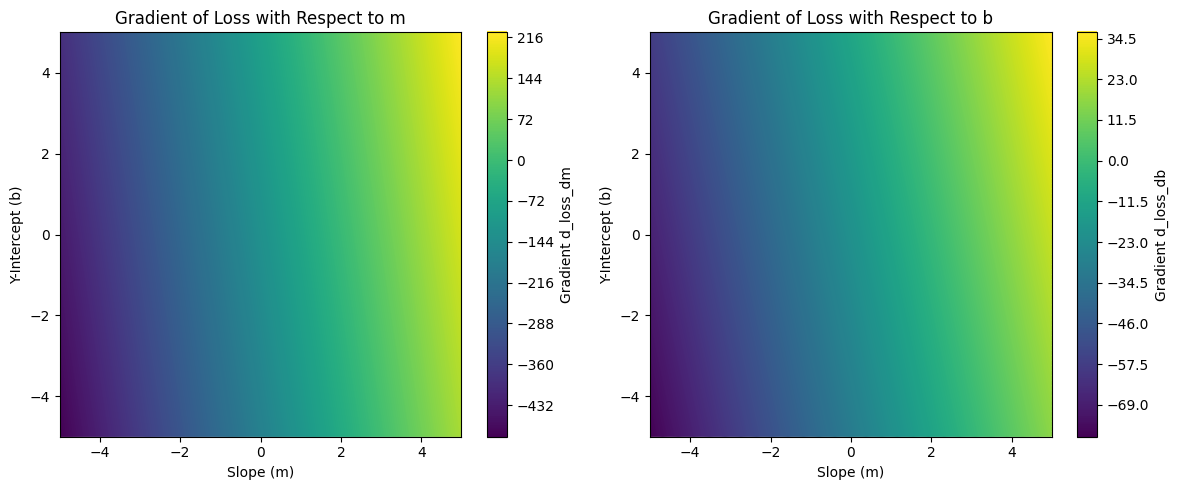

In [72]:
# Create a grid of "m" and "b" values
M, B = np.meshgrid(m_values, b_values)

# Compute the gradients for d_loss_dm and d_loss_db
d_loss_dm_values = np.zeros_like(M)
d_loss_db_values = np.zeros_like(B)

for i in range(len(m_values)):
    for j in range(len(b_values)):
        m = M[i, j]
        b = B[i, j]
        d_loss_dm_values[i, j] = d_loss_dm(x, y, m, b)
        d_loss_db_values[i, j] = d_loss_db(x, y, m, b)

# Create contour plots for d_loss_dm
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
contour_dm = plt.contour(M, B, d_loss_dm_values, levels=500, cmap='viridis')
plt.colorbar(contour_dm, label='Gradient d_loss_dm')
plt.xlabel('Slope (m)')
plt.ylabel('Y-Intercept (b)')
plt.title('Gradient of Loss with Respect to m')

# Create contour plots for d_loss_db
plt.subplot(1, 2, 2)
contour_db = plt.contour(M, B, d_loss_db_values, levels=500, cmap='viridis')
plt.colorbar(contour_db, label='Gradient d_loss_db')
plt.xlabel('Slope (m)')
plt.ylabel('Y-Intercept (b)')
plt.title('Gradient of Loss with Respect to b')

plt.tight_layout()
plt.show()

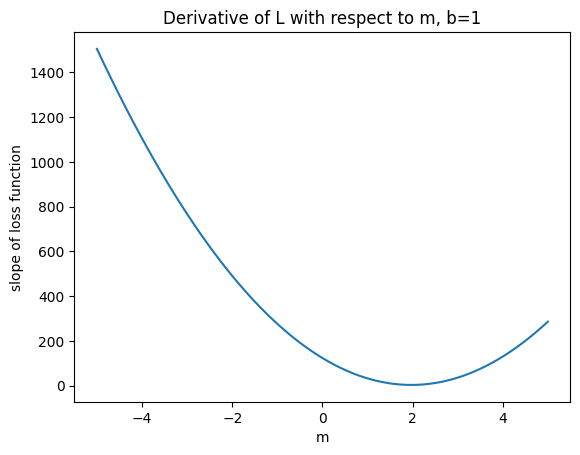

In [73]:
# Calculate the loss (objective function value) for each "m" value
m_grads = np.zeros_like(m_values)

for i in range(len(m_values)):
    m = m_values[i]
    # freeze b parameter
    b = 1
    params = m, b
    m_grads[i] = objective(params, x, y)

plt.plot(m_values, m_grads)
plt.xlabel("m")
plt.ylabel("slope of loss function")
plt.title("Derivative of L with respect to m, b=1")
plt.show()

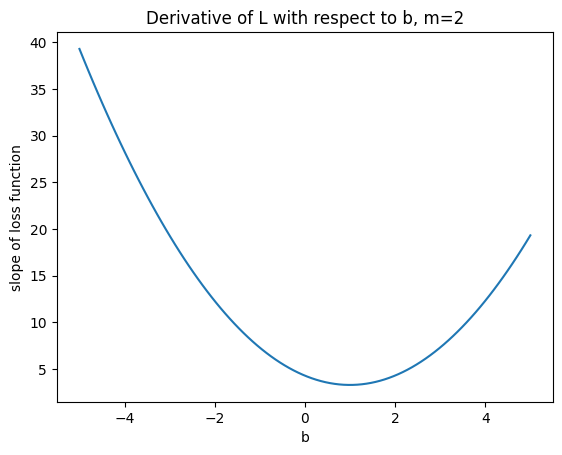

In [74]:
# Calculate the loss (objective function value) for each "m" value
b_grads = np.zeros_like(b_values)

for i in range(len(b_values)):
    b = b_values[i]
    # freeze b parameter
    m = 2
    params = m, b
    b_grads[i] = objective(params, x, y)

plt.plot(b_values, b_grads)
plt.xlabel("b")
plt.ylabel("slope of loss function")
plt.title("Derivative of L with respect to b, m=2")
plt.show()

### Gradient descent

In [75]:
learning_rate = 0.0005

n_iterations = 500

m_opt = np.random.randn()
b_opt = np.random.randn()

losses = []

for i in range(n_iterations):
    
    m_grad = d_loss_dm(x, y, m_opt, b_opt)
    b_grad = d_loss_db(x, y, m_opt, b_opt)
    
    
    # print("m opt:", m_opt)
    # print("b opt:", b_opt)
    # 
    # print("m grad: ", m_grad)
    # print("b grad: ", b_grad)
        
    m_opt -= m_grad * learning_rate
    b_opt -= b_grad * learning_rate
    
    params = m_opt, b_opt
    loss = objective(params, x, y)
    # print(loss)
    losses.append(loss)

print(f"Optimal Slope (m): {m_opt}")
print(f"Optimal Y-Intercept (b): {b_opt}")
print(f"Minimum Loss Value: {losses[-1]}")

Optimal Slope (m): 1.866924036148787
Optimal Y-Intercept (b): 1.6977366931524902
Minimum Loss Value: 3.2466592371068743


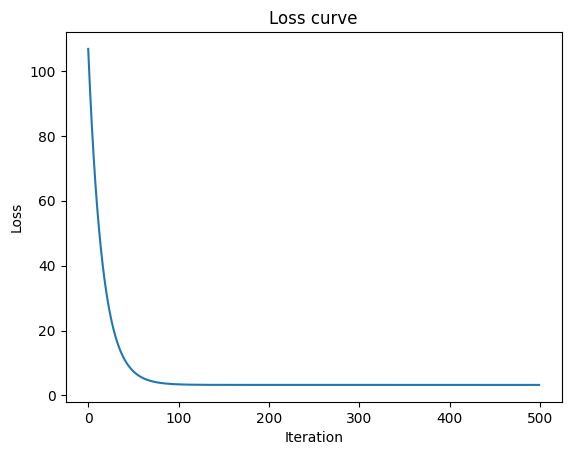

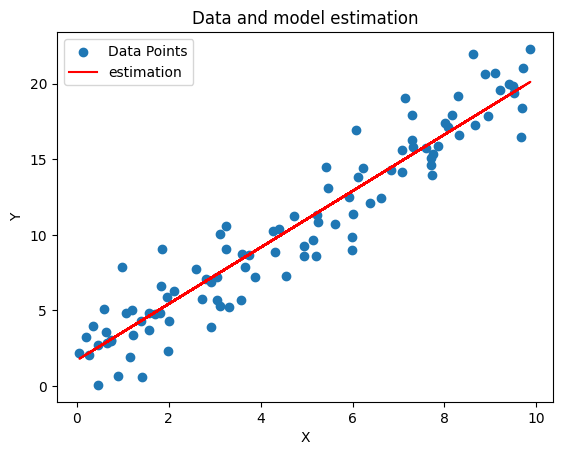

In [76]:
# plot loss curve
iterations = np.arange(n_iterations)
plt.plot(iterations, losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

# Plot the data points
plt.scatter(x, y, label="Data Points")
plt.plot(x, m_opt * x + b_opt, color='red', label="estimation")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Data and model estimation")
plt.show()